**Diabetes KNN Project**

In this project, I will fit a K-Nearest Neighbors (KNN) model to the diabetes dataset and evaluate its performance metrics. This script is intended solely for informational purposes to demonstrate key concepts of the K-Nearest Neighbors algorithm.

In [1]:
#importing the modules 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn  as sns
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/DELL/Documents/Data Science/datasets_1/diabetes.csv')

Data inspection 

In [3]:
#first few rows
df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [4]:
#viewing the last few rows 
df.tail()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1
4302,37,1,34.3,120,71,4.97,5.42,2.66,1.08,2.87,81.0,4.61,75.5,8.20,1.000000,2.000000,0,1


In [5]:
#checking for structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

We have 18 variables and 4303 observations 

In [6]:
#checking for duplicates
sum(df.duplicated())

0

**Exploratory Data Analysis**

In [7]:
#summary of the numeric variables

#dropping the categorical variables
numeric = df.drop(columns = ["Gender", "family_histroy", "drinking", "smoking", "Diabetes"])
numeric.describe()

,Age,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084
std,14.686155,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568
min,22.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000
25%,35.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000
50%,46.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000
75%,59.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000
max,93.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000


**Demographic Factors**

Gender
1    64.838485
2    35.161515
Name: proportion, dtype: float64

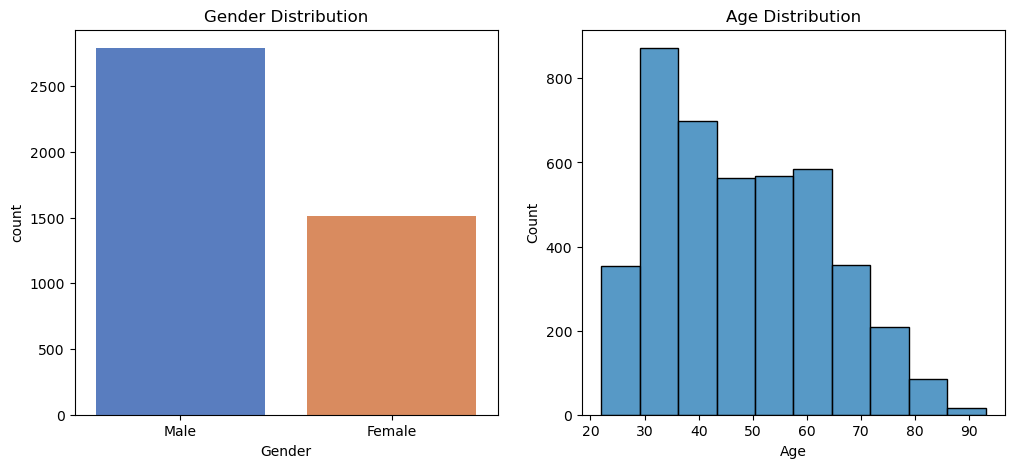

In [8]:

fig, axes = plt.subplots(1,2, figsize = (12,5))

#Gender
sns.countplot(x=df['Gender'], ax = axes[0], palette = 'muted')
axes[0].set_title("Gender Distribution")
axes[0].set_xticks([0, 1]) 
axes[0].set_xticklabels(["Male", "Female"]) 
#Histogram of age 
sns.histplot(x= df['Age'], ax = axes[1], bins = 10)
axes[1].set_title("Age Distribution")

##gender 
df['Gender'].value_counts(normalize = True)*100


As it can be noted, there were more male than females in the dataset. Most people are aged  around (30-60) years 

**Medical Characteristics**

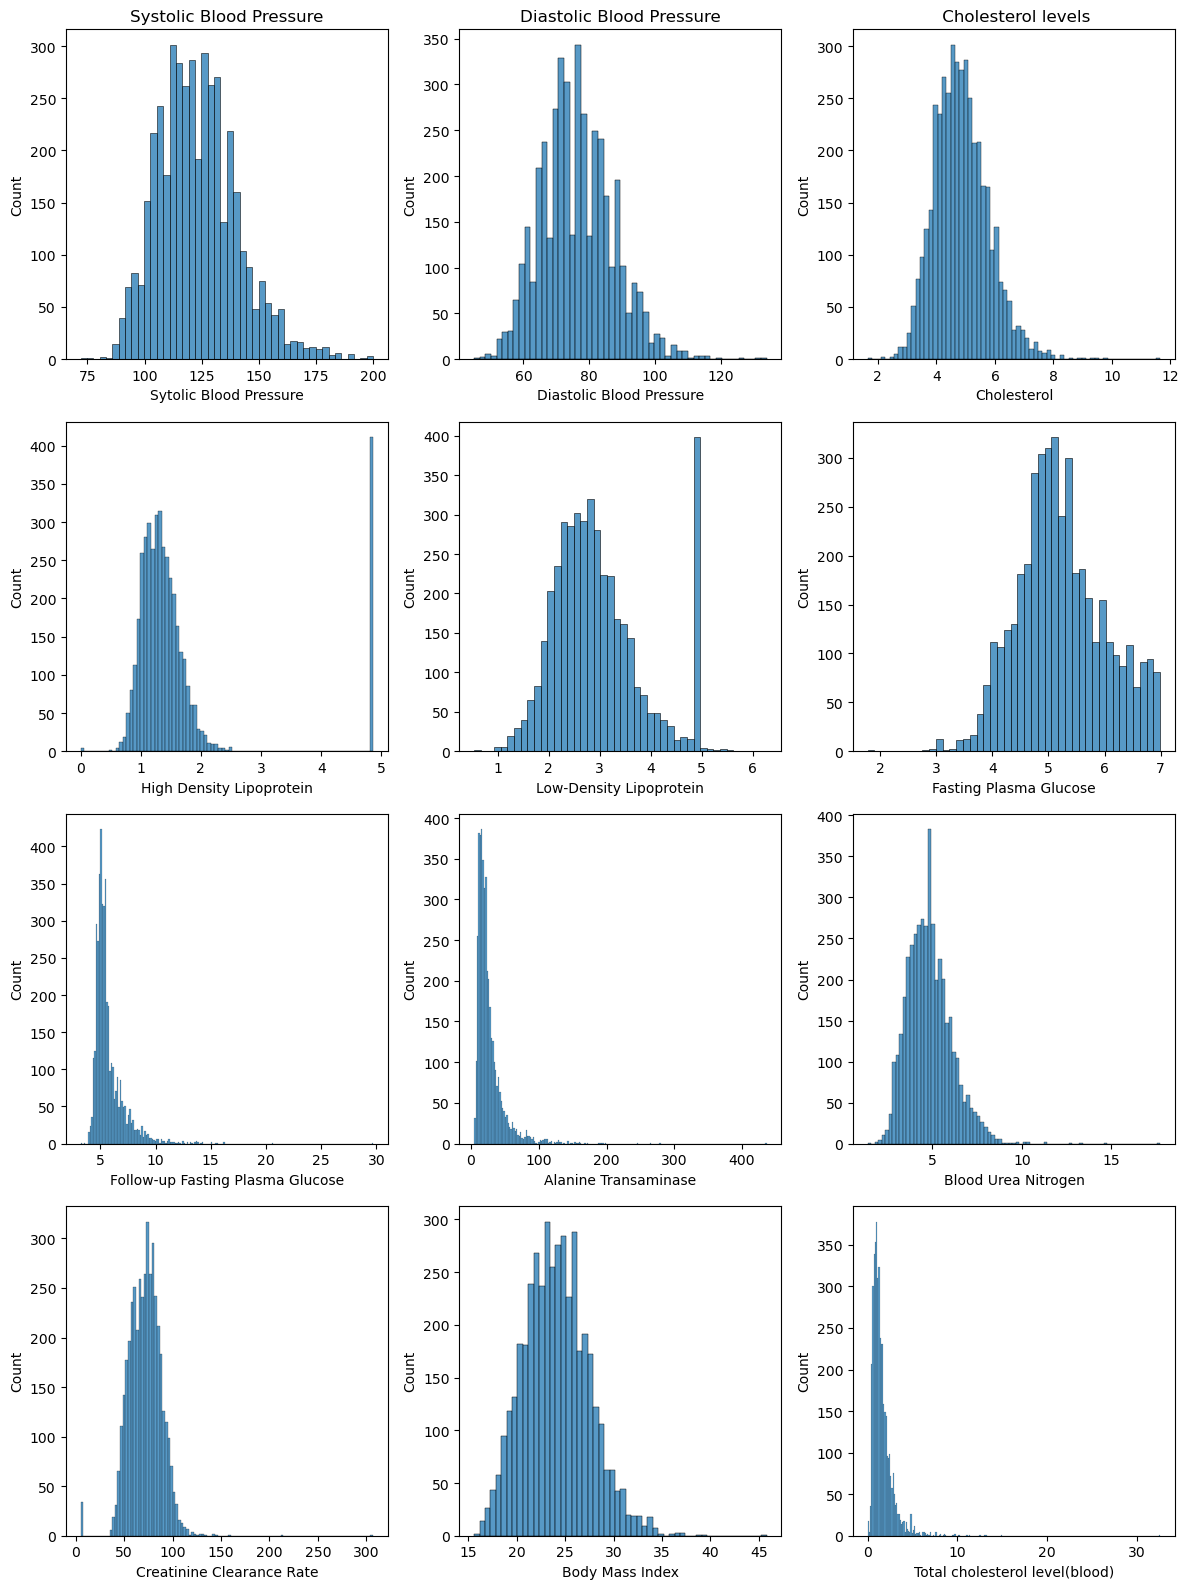

In [9]:
fig, axes = plt.subplots(4,3, figsize = (12,16))
#systolic blood pressure 
sns.histplot(x=df['SBP'], ax = axes[0,0])
axes[0,0].set_title("Systolic Blood Pressure")
axes[0,0].set_xlabel("Sytolic Blood Pressure")

#Diastolic Blood pressure
sns.histplot(x=df['DBP'], ax = axes[0,1])
axes[0,1].set_title("Diastolic Blood Pressure")
axes[0,1].set_xlabel("Diastolic Blood Pressure")

#Cholesterol levels 
sns.histplot(x=df['Chol'], ax = axes[0,2])
axes[0,2].set_title(" Cholesterol levels")
axes[0,2].set_xlabel("Cholesterol")

#High Density lipoprotein (good  cholesterol) 
sns.histplot(x=df['HDL'], ax = axes[1,0])
axes[1,0].set_xlabel("High Density Lipoprotein")

#Low-Density Lipoprotein (bad cholesterol) 
sns.histplot(x=df['LDL'], ax = axes[1,1])
axes[1,1].set_xlabel("Low-Density Lipoprotein")


#Fasting Plasma Glucose
sns.histplot(x=df['FPG'], ax = axes[1,2])
axes[1,2].set_xlabel("Fasting Plasma Glucose")

#FFPG 
sns.histplot(x=df['FFPG'], ax = axes[2,0])
axes[2,0].set_xlabel("Follow-up Fasting Plasma Glucose")

#ALT
sns.histplot(x=df['ALT'], ax = axes[2,1])
axes[2,1].set_xlabel("Alanine Transaminase")

#BUN
sns.histplot(x=df['BUN'], ax = axes[2,2])
axes[2,2].set_xlabel("Blood Urea Nitrogen")

#CCR
sns.histplot(x=df['CCR'], ax = axes[3,0])
axes[3,0].set_xlabel("Creatinine Clearance Rate")

#BMI
sns.histplot(x=df['BMI'], ax = axes[3,1])
axes[3,1].set_xlabel("Body Mass Index")

#Total cholesterol level in the blood
sns.histplot(x=df['Tri'], ax = axes[3,2])
axes[3,2].set_xlabel("Total cholesterol level(blood)")

plt.tight_layout()

plt.show()

**Family History**

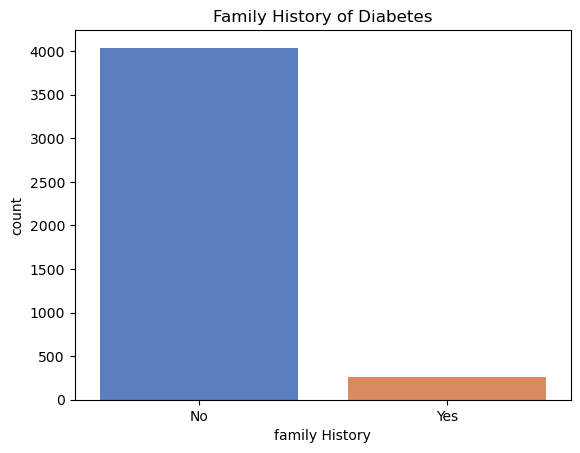

In [10]:
#Family history
sns.countplot(x=df['family_histroy'], palette = "muted")
plt.title("Family History of Diabetes")
plt.xlabel("family History")
plt.xticks(['0', '1'], labels = ["No", "Yes"])
plt.show()

**Lifestyle Factors**

<Axes: xlabel='smoking', ylabel='count'>

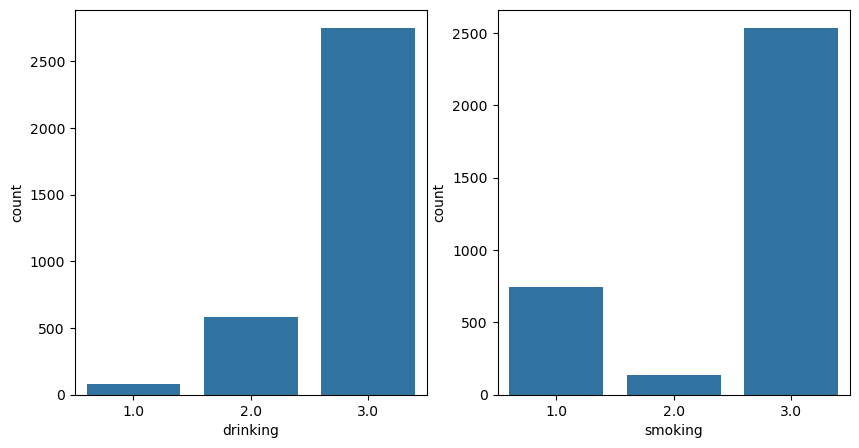

In [11]:
# Keep only rows where 'drinking' is in the valid categories (1, 2, 3)
df = df[df['drinking'].isin([1, 2, 3])]
# Keep only rows where 'smoking' is in the valid categories (1, 2, 3)
df = df[df['smoking'].isin([1, 2, 3])]

fig, axes = plt.subplots(1,2, figsize = (10,5))
#drinking bar chart
sns.countplot(x=df['drinking'], ax = axes[0])

#smoking bar chart
sns.countplot(x=df['smoking'], ax = axes[1])


In [12]:
#assesing the target variable
print(df['Diabetes'].value_counts(normalize=True)*100)

Diabetes
0    87.847731
1    12.152269
Name: proportion, dtype: float64


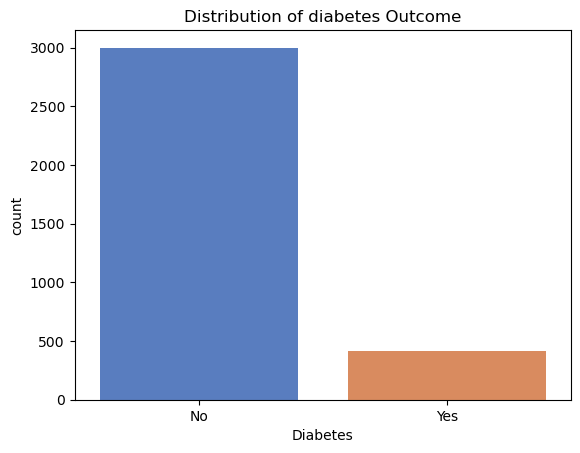

In [13]:
#chart 
sns.countplot(x = df['Diabetes'], palette ='muted')
plt.title('Distribution of diabetes Outcome')
plt.xticks([0, 1], labels =['No', 'Yes'])
plt.show()

**FITTING THE MODEL**

In [14]:
#defining predictors and the variables 
X = df.drop(columns = ['Diabetes'])
y = df['Diabetes']

**Splitting the dataset**

In [15]:
#defining the training and the testing split 
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
#standadizing the predictors 
scaler = MinMaxScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

I only scaled the X_train and then transformed X_test using the same parameters as of used in X_train   to prevent data leakage.

**Hyperparameter Tuning**

In [20]:
#Using Grid search to find the best parameters 

#listing the parameters 
knn = KNeighborsClassifier ()
param_grid ={
'n_neighbors' : range(1, 31), #the number of neighbors to be considered in voting 
'weights' : ['uniform', 'distance'],
#uniform means all neighbors have equal vote influence
#distance - closer neighbors have more influyence than distant ones 
'metric' : ['euclidean', 'manhattan']}


In [21]:
#defining the cross validation
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 4, random_state = 123)

In [22]:
#grid search 
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, n_jobs = -1, cv=cv, scoring = 'f1', error_score = 0)

#n_jobs tells the grid search to run through parallel processing (use all available CPU scores)
#error_score = 0 assigns an incorrect combination 0 rather than crashing 

In [23]:
#fitting the model with the best hyperparameters 
best_model = grid_search.fit(X_train, y_train)

In [24]:
#getting the best parameters
best_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}

**Making predictions**

In [25]:
#predictions 
y_pred = best_model.predict(X_test)

In [26]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9443631039531479


In [27]:
#classsification report 
print(f'Classification Report\n: {classification_report(y_test, y_pred)}')

Classification Report
:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       606
           1       0.88      0.58      0.70        77

    accuracy                           0.94       683
   macro avg       0.92      0.79      0.84       683
weighted avg       0.94      0.94      0.94       683



In [29]:
#saving the model
import pickle as pkl
pkl.dump(best_model, open("Best_Knn_model.p", "wb"))